# Pruebas clasificadores

/home/roberto/Documentos/us/practicas/aia/trabajo/clasificadores_lineales.py:347: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-wx))


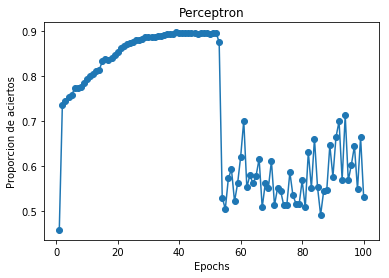

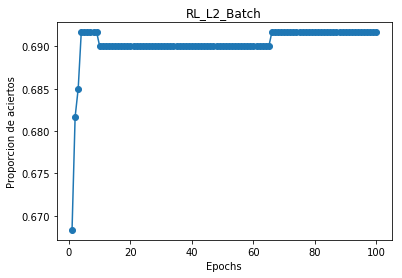

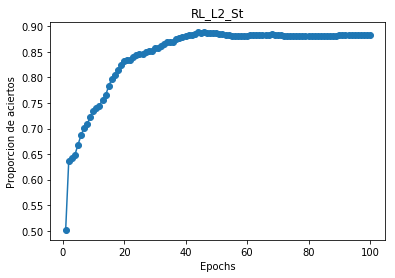

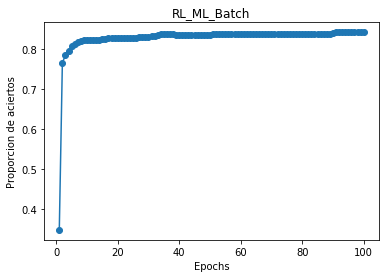

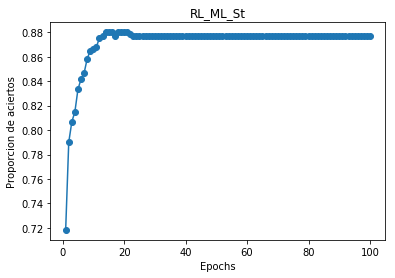

---VOTOS---
{'ovr_perceptron': 0.927536231884058, 'ovr_rl_l2_batch': 0.927536231884058, 'ovr_rl_l2_st': 0.9420289855072463, 'ovr_rl_ml_batch': 0.9710144927536232, 'ovr_rl_ml_st': 0.9130434782608695, 'rl_softmax': 0.927536231884058}
('ovr_rl_ml_batch', 0.9710144927536232)


In [1]:
from clasificadores_lineales import *
import numpy as np

In [ ]:
# Generamos un conjunto de datos linealmente separables, 
X1,Y1=genera_conjunto_de_datos_l_s(4,8,400)

# Lo partimos en dos trozos:
X1e,Y1e=X1[:300],Y1[:300]

X1t,Y1t=X1[300:],Y1[300:]

# Creamos el clasificador (perceptrón umbral en este caso): 
clas_pb1=Clasificador_Perceptron([0,1], normalizacion = True)

# Lo entrenamos con elprimero de los conjuntos de datos:
clas_pb1.entrena(X1e,Y1e,100,rate_decay=True,rate=0.001)

# Clasificamos un ejemplo del otro conjunto, y lo comparamos con su clase real:
clas_pb1.clasifica(X1t[0]),Y1t[0]

sum(clas_pb1.clasifica(x) == y for x,y in zip(X1t,Y1t))/len(Y1t)

In [ ]:
#Igual pero con datos NO linealmente separables
X2,Y2 = genera_conjunto_de_datos_n_l_s(4,8,400,0.1)

X2e,Y2e=X2[:300],Y2[:300]

X2t,Y2t=X2[300:],Y2[300:]

clas_pb2=Clasificador_Perceptron([0,1])

clas_pb2.entrena(X2e,Y2e,100,rate_decay=True,rate=0.001)

clas_pb2.clasifica(X2t[0]),Y2t[0]

print(sum(clas_pb2.clasifica(x) == y for x,y in zip(X2t,Y2t))/len(Y2t))

In [ ]:
X1,Y1=genera_conjunto_de_datos_l_s(4,8,400)

# Lo partimos en dos trozos:
X1e,Y1e=X1[:300],Y1[:300]

X1t,Y1t=X1[300:],Y1[300:]

# Creamos el clasificador (perceptrón umbral en este caso): 
clas_pb1=Clasificador_RL_L2_Batch([0,1])

# Lo entrenamos con elprimero de los conjuntos de datos:
clas_pb1.entrena(X1e,Y1e,100,rate_decay=True,rate=0.001)

# Clasificamos un ejemplo del otro conjunto, y lo comparamos con su clase real:
clas_pb1.clasifica(X1t[0]),Y1t[0]

sum(clas_pb1.clasifica(x) == y for x,y in zip(X1t,Y1t))/len(Y1t)

In [ ]:
X1,Y1=genera_conjunto_de_datos_l_s(4,8,400)

# Lo partimos en dos trozos:
X1e,Y1e=X1[:300],Y1[:300]

X1t,Y1t=X1[300:],Y1[300:]

# Creamos el clasificador (perceptrón umbral en este caso): 
clas_pb1=Clasificador_RL_L2_St([0,1], normalizacion = True)

# Lo entrenamos con elprimero de los conjuntos de datos:
clas_pb1.entrena(X1e,Y1e,100,rate_decay=True,rate=0.001)

# Clasificamos un ejemplo del otro conjunto, y lo comparamos con su clase real:
clas_pb1.clasifica(X1t[0]),Y1t[0]

sum(clas_pb1.clasifica(x) == y for x,y in zip(X1t,Y1t))/len(Y1t)

In [ ]:
X1,Y1=genera_conjunto_de_datos_l_s(4,8,400)

# Lo partimos en dos trozos:
X1e,Y1e=X1[:300],Y1[:300]

X1t,Y1t=X1[300:],Y1[300:]

# Creamos el clasificador (perceptrón umbral en este caso): 
clas_pb1=Clasificador_RL_ML_Batch([0,1])

# Lo entrenamos con elprimero de los conjuntos de datos:
clas_pb1.entrena(X1e,Y1e,100,rate_decay=True,rate=0.001)

# Clasificamos un ejemplo del otro conjunto, y lo comparamos con su clase real:
clas_pb1.clasifica(X1t[0]),Y1t[0]

sum(clas_pb1.clasifica(x) == y for x,y in zip(X1t,Y1t))/len(Y1t)

In [ ]:
X1,Y1=genera_conjunto_de_datos_l_s(4,8,400)

# Lo partimos en dos trozos:
X1e,Y1e=X1[:300],Y1[:300]

X1t,Y1t=X1[300:],Y1[300:]

# Creamos el clasificador (perceptrón umbral en este caso): 
clas_pb1=Clasificador_RL_ML_St([0,1])

# Lo entrenamos con elprimero de los conjuntos de datos:
clas_pb1.entrena(X1e,Y1e,100,rate_decay=True,rate=0.001)

# Clasificamos un ejemplo del otro conjunto, y lo comparamos con su clase real:
clas_pb1.clasifica(X1t[0]),Y1t[0]

sum(clas_pb1.clasifica(x) == y for x,y in zip(X1t,Y1t))/len(Y1t)

### One vs Rest

In [ ]:
from iris import *
for i, clase in enumerate(iris_entr_clas):
    if clase == iris_clases[0]:
        iris_entr_clas[i] = 0
    elif clase == iris_clases[1]:
        iris_entr_clas[i] = 1
    else:
        iris_entr_clas[i] = 2
print(iris_entr_clas)

In [ ]:
entr = np.array(iris_entr)
entr_clas = np.array(iris_entr_clas)
clasificador = Clasificador_RL_OvR(Clasificador_RL_ML_St, [0, 1, 2])
clasificador.entrena(entr, entr_clas, 500, rate_decay=True, rate=0.01)
print(iris_clases)
print(clasificador.clasifica(entr[25]),entr_clas[25])
print(clasificador.clasifica(entr[78]),entr_clas[78])

### RL Softmax

In [ ]:
entr = np.array(iris_entr)
entr_clas = np.array(iris_entr_clas)
clasificador = Clasificador_RL_Softmax([0, 1, 2])
clasificador.entrena(entr, entr_clas, 500, rate_decay=False, rate=0.01)
print(iris_clases)
print(clasificador.clasifica(entr[25]),entr_clas[25])
print(clasificador.clasifica(entr[78]),entr_clas[78])

#### Rendimiento

In [ ]:
rendimiento(clasificador, entr, entr_clas)

## Votos

In [ ]:
entrenar_y_rendimiento_multis(500, 0.001, True, [0,1], votos_entr,
                              votos_entr_clas, votos_valid,
                              votos_valid_clas)

In [ ]:
entrenar_y_rendimiento_multis(500, 0.001, False, [0,1], votos_entr,
                              votos_entr_clas, votos_valid,
                              votos_valid_clas)

In [ ]:
entrenar_y_rendimiento_multis(500, 0.01, False, [0,1], votos_entr,
                              votos_entr_clas, votos_valid,
                              votos_valid_clas)

In [ ]:
entrenar_y_rendimiento_multis(100, 0.001, True, [0,1], votos_entr,
                              votos_entr_clas, votos_valid,
                              votos_valid_clas)

## MNIST

In [2]:
#softmax = Clasificador_RL_Softmax([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#softmax.entrena(train, train_clas, 50, rate_decay=True, rate=0.05)
ovr = Clasificador_RL_OvR(Clasificador_RL_ML_St, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [3]:
ovr.entrena(train, train_clas, 500, 0.05, True)
rendimiento(ovr, validation, validation_clas)

0.1088911088911089

In [ ]:
print(train[5])

In [ ]:
sum(ovr.clasifica(x) == y for x,y in zip(validation,validation_clas))/len(validation_clas)

In [ ]:
#entrenar_y_rendimiento_multis(200, 0.001, True, [0,1,2,3,4,5,6,7,8,9], train,
#                              train_clas, validation,
#                              validation_clas)

## Pruebas de Numpy

In [ ]:
a = np.array([[9987.7,54.8,3],[4,45,20]])
media = np.mean(a, axis = 0)
desviacion = np.std(a, axis = 0)
#a = (a - media) / desviacion
for ej in np.nditer(a):
    print(ej)

In [9]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[10,11,12],[13,14,15]])
np.tensordot(x,y, 2)

array(280)